In [ ]:
import math, time, random, datetime

# data analysis and wrangling
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [ ]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#import for interactive plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

In [ ]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler

In [ ]:
# machine learning
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV, learning_curve, cross_val_score
#from catboost import CatBoostClassifier, Pool, cv

ModuleNotFoundError: ignored

In [ ]:
# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Attrition_prediction.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
# drop the unnecessary columns
df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [ ]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [ ]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition']==0]

In [ ]:
def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,6))
  
    # Count Plot
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    # Attrition Count per factors
    sns.countplot(col_name, hue='Attrition',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')

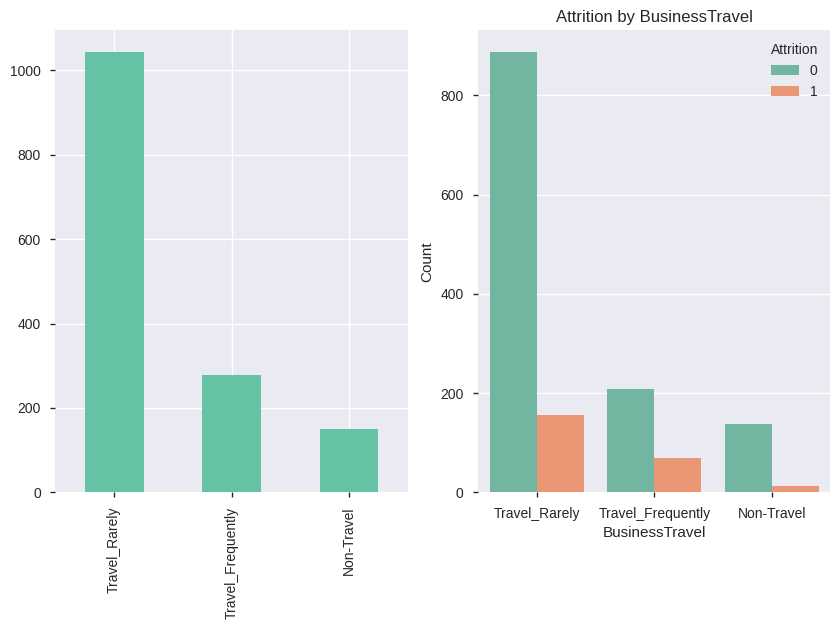

In [ ]:
categorical_column_viz('BusinessTravel')

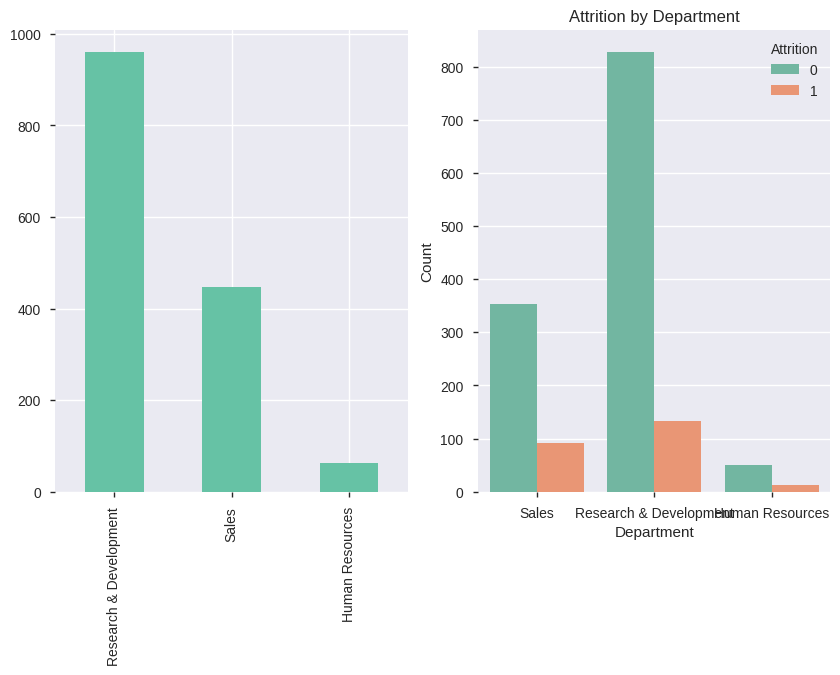

In [ ]:
categorical_column_viz('Department')

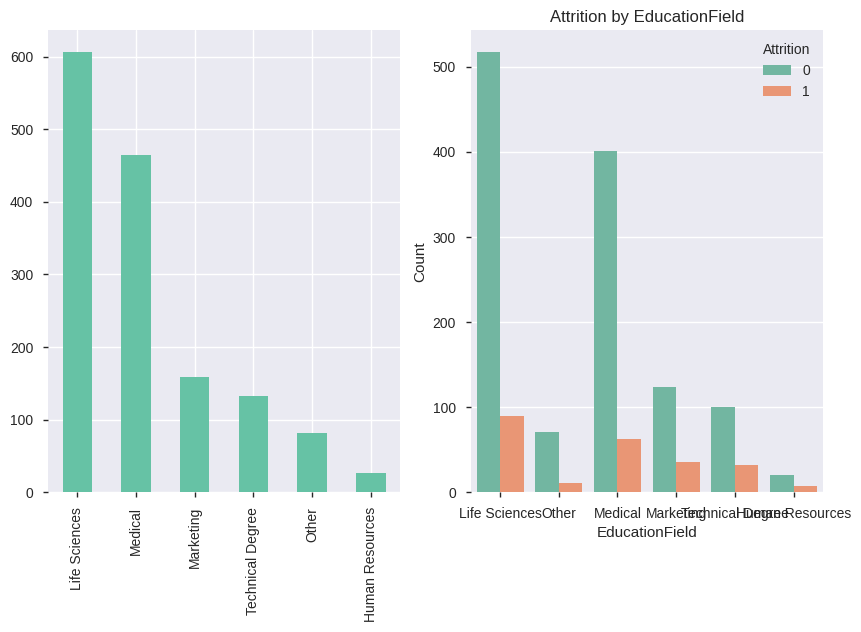

In [ ]:
categorical_column_viz('EducationField')

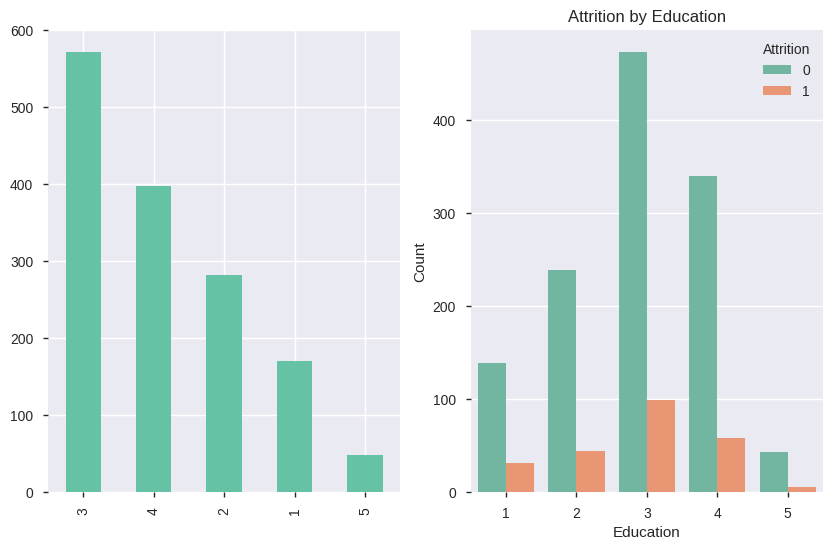

In [ ]:
categorical_column_viz('Education')

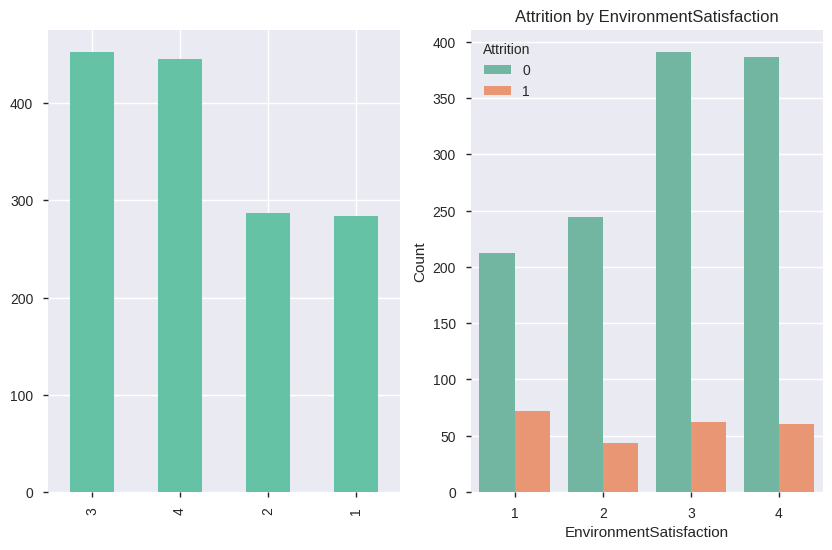

In [ ]:
categorical_column_viz('EnvironmentSatisfaction')

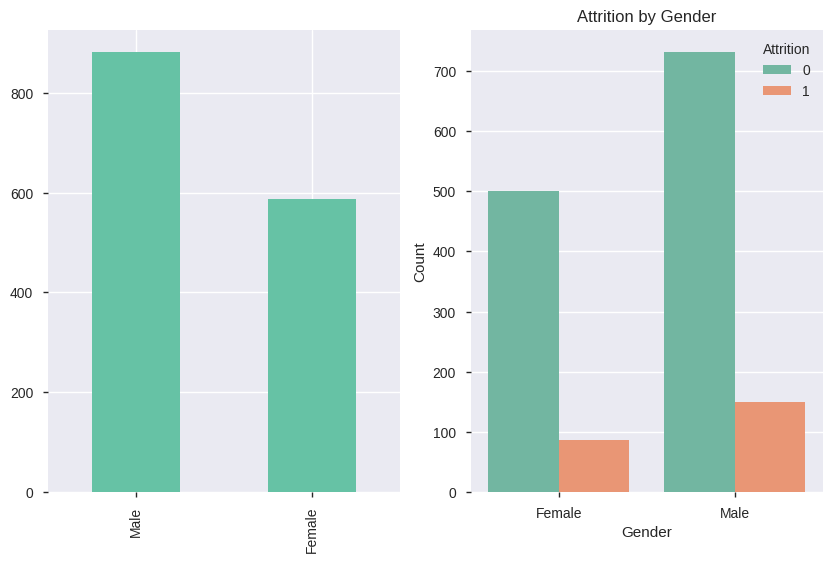

In [ ]:
categorical_column_viz('Gender')

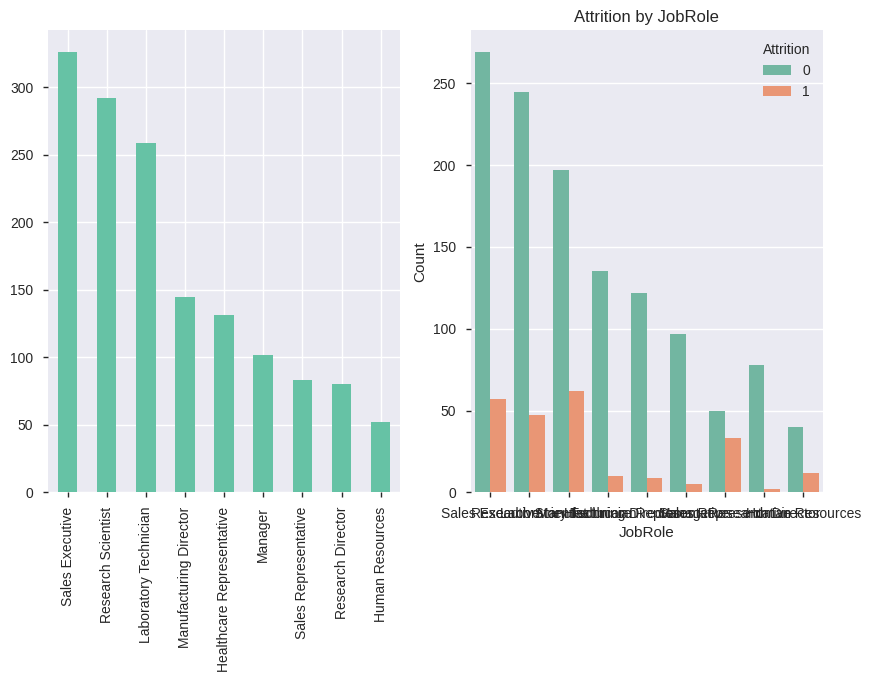

In [ ]:
categorical_column_viz('JobRole')

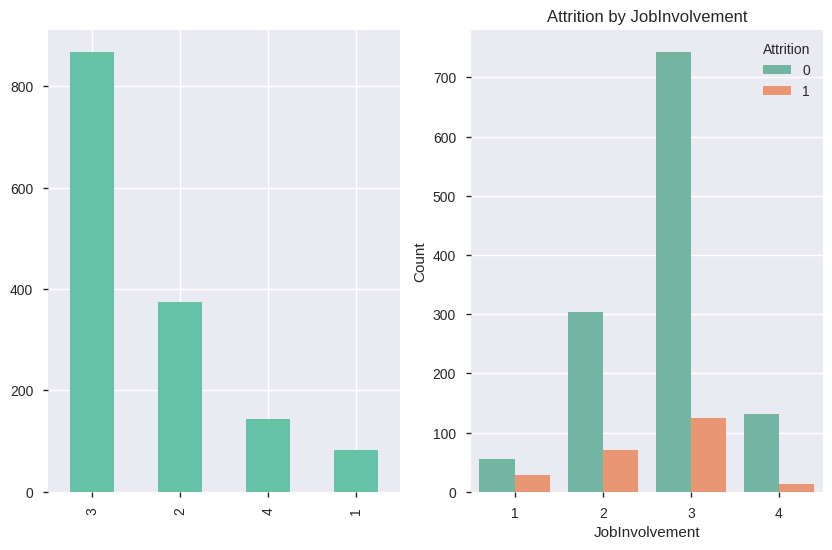

In [ ]:
categorical_column_viz('JobInvolvement')

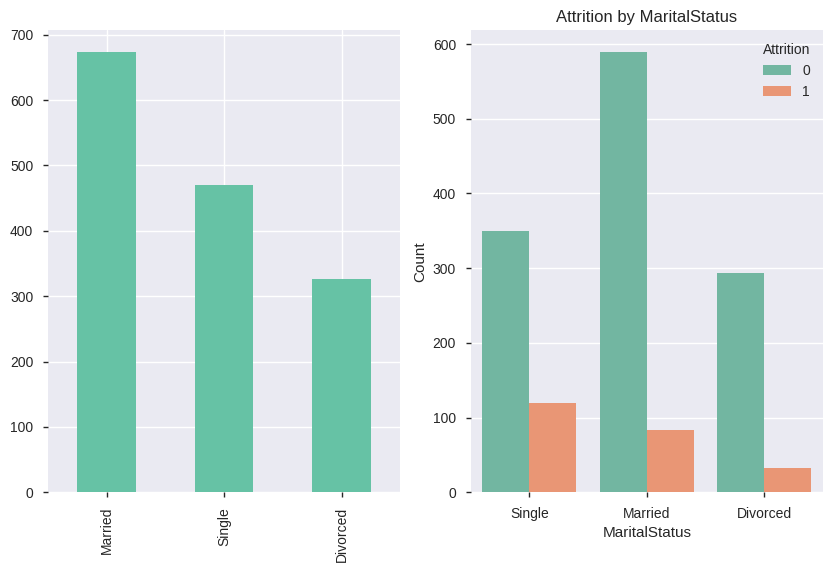

In [ ]:
categorical_column_viz('MaritalStatus')

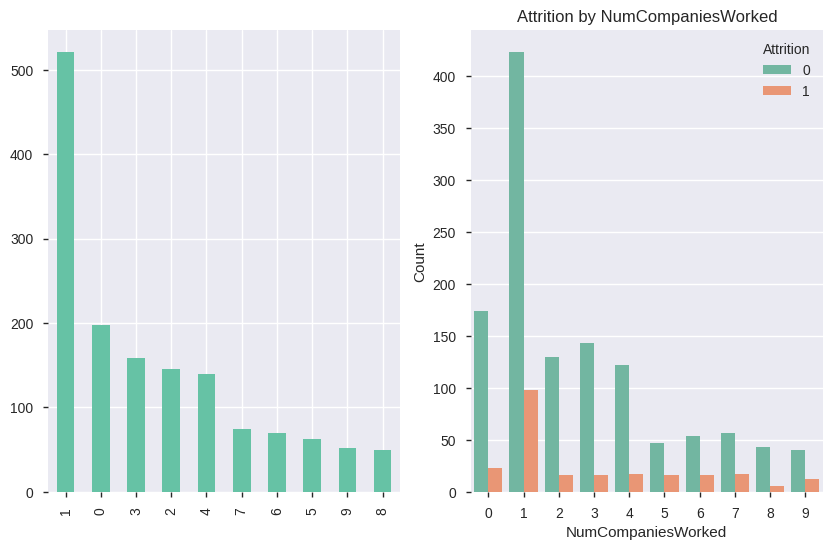

In [ ]:
categorical_column_viz('NumCompaniesWorked')

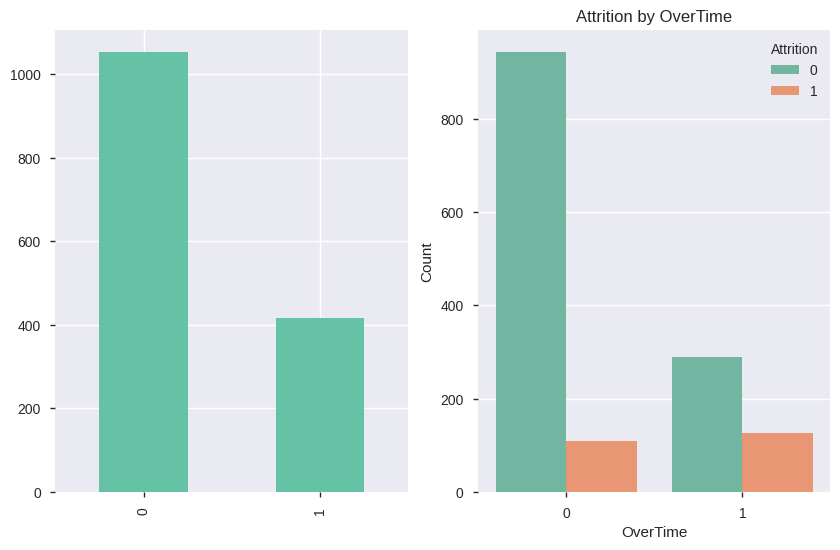

In [ ]:
categorical_column_viz('OverTime')

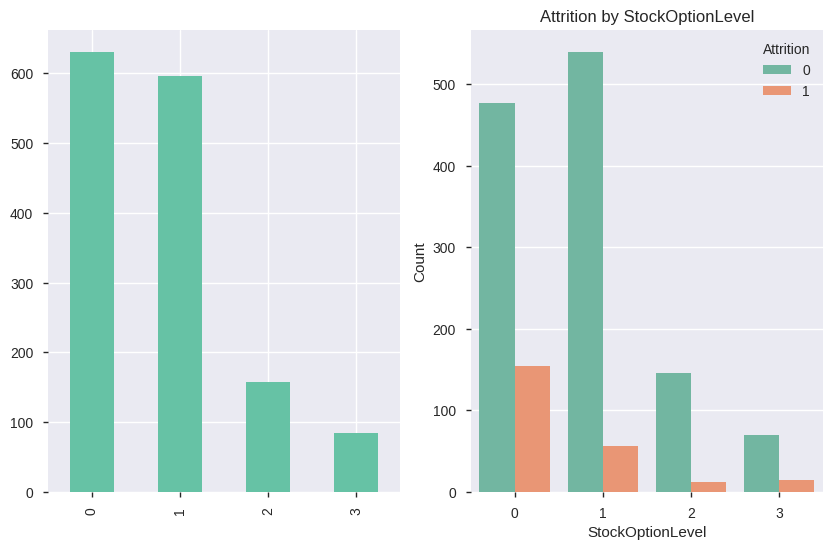

In [ ]:
categorical_column_viz('StockOptionLevel')

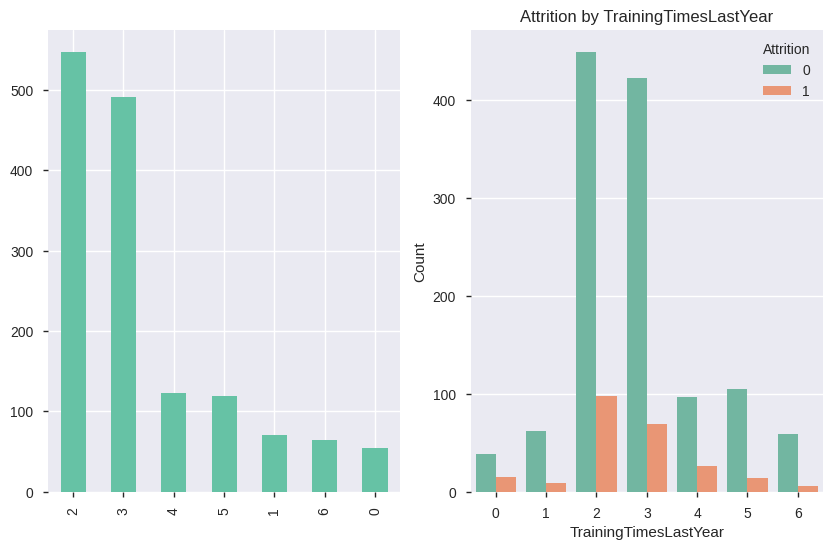

In [ ]:
categorical_column_viz('TrainingTimesLastYear')

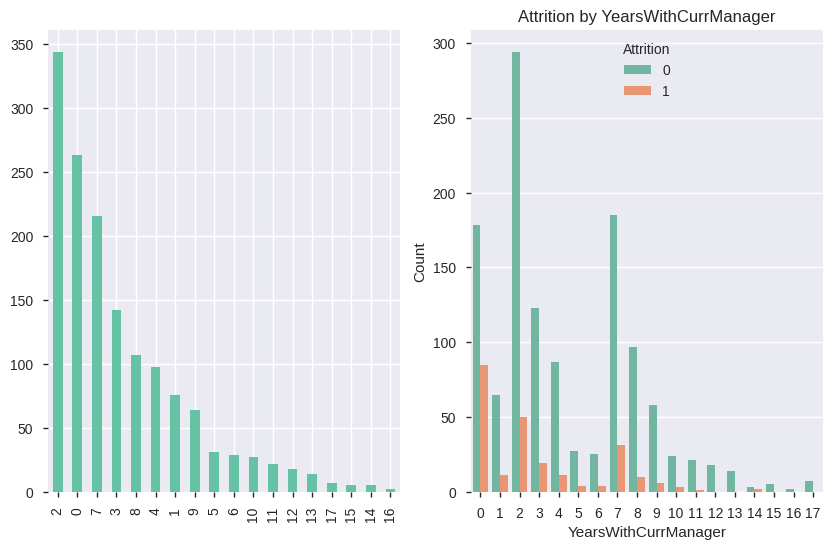

In [ ]:
categorical_column_viz('YearsWithCurrManager')

In [ ]:
def numerical_column_viz(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(attrition[col_name], label='Employee who left',ax=ax[0], shade=True, color='palegreen')
    sns.kdeplot(no_attrition[col_name], label='Employee who stayed', ax=ax[0], shade=True, color='salmon')
    
    sns.boxplot(y=col_name, x='Attrition',data=df, palette='Set3', ax=ax[1])

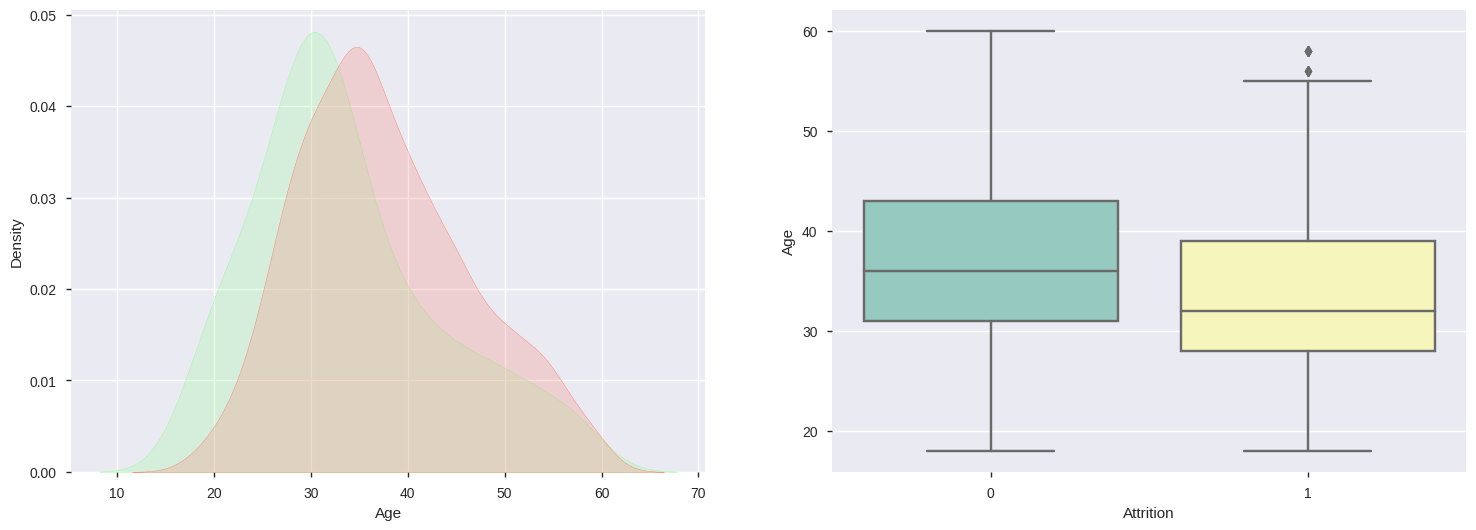

In [ ]:
numerical_column_viz("Age")

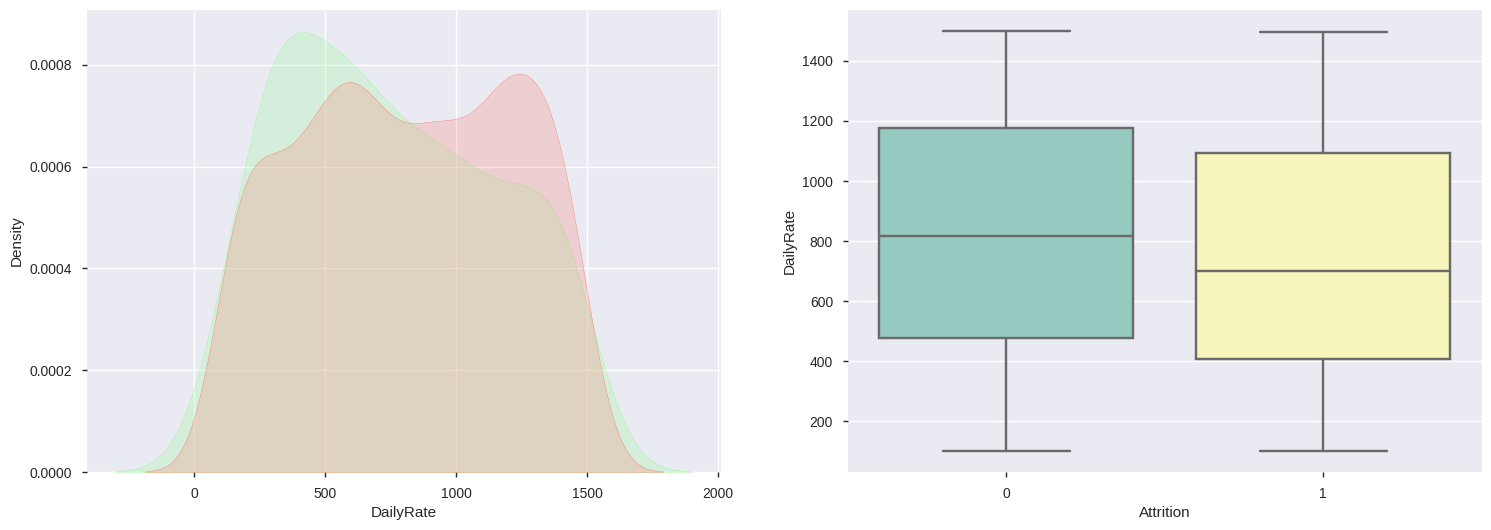

In [ ]:
numerical_column_viz("DailyRate")

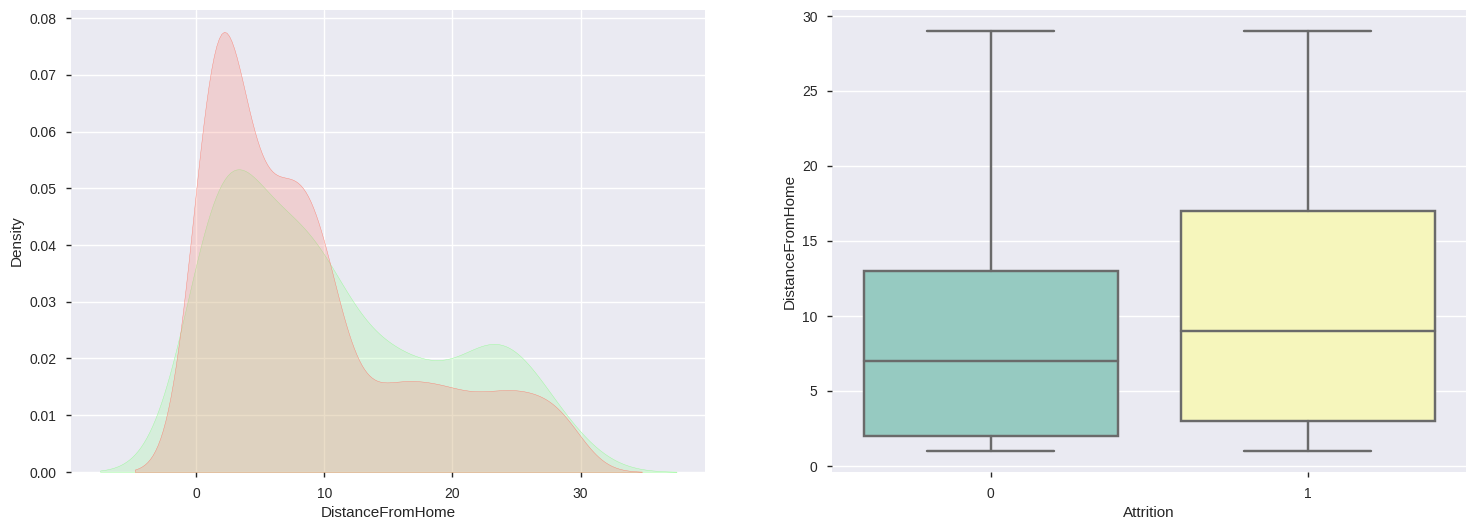

In [ ]:
numerical_column_viz("DistanceFromHome")

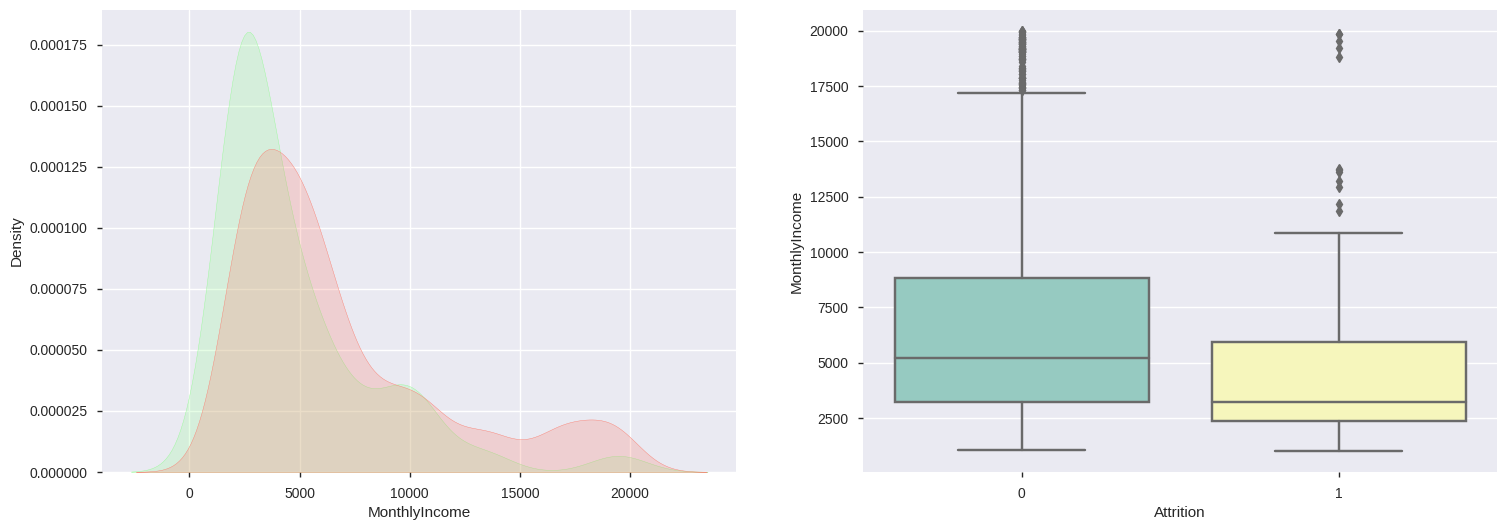

In [ ]:
numerical_column_viz("MonthlyIncome")

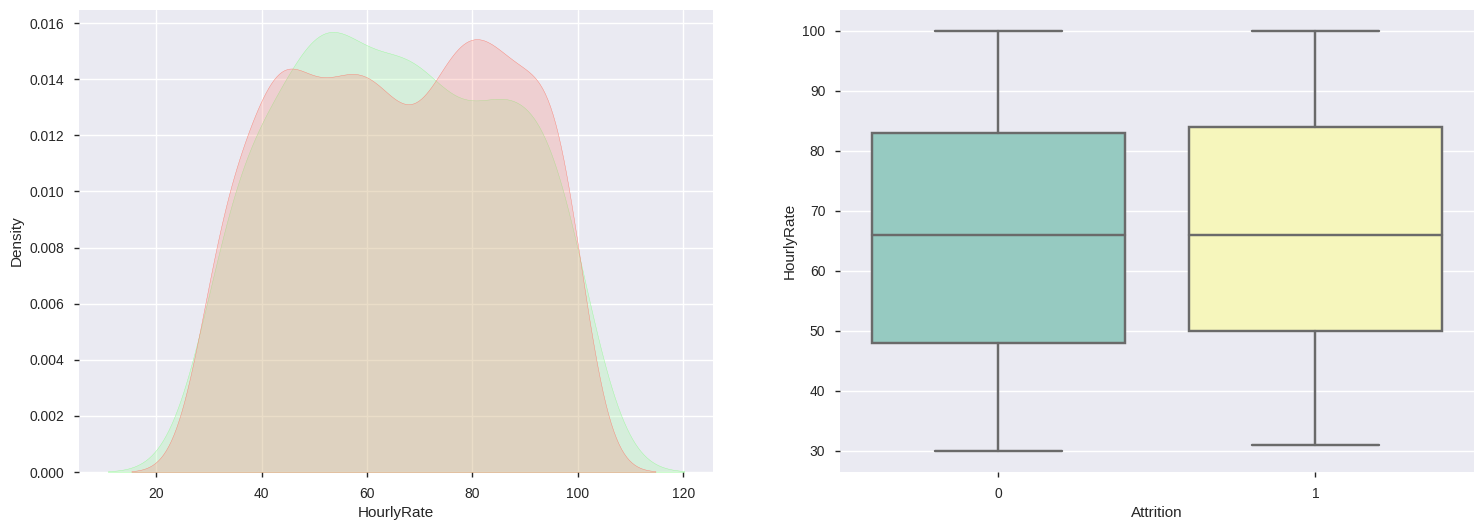

In [ ]:
numerical_column_viz("HourlyRate")

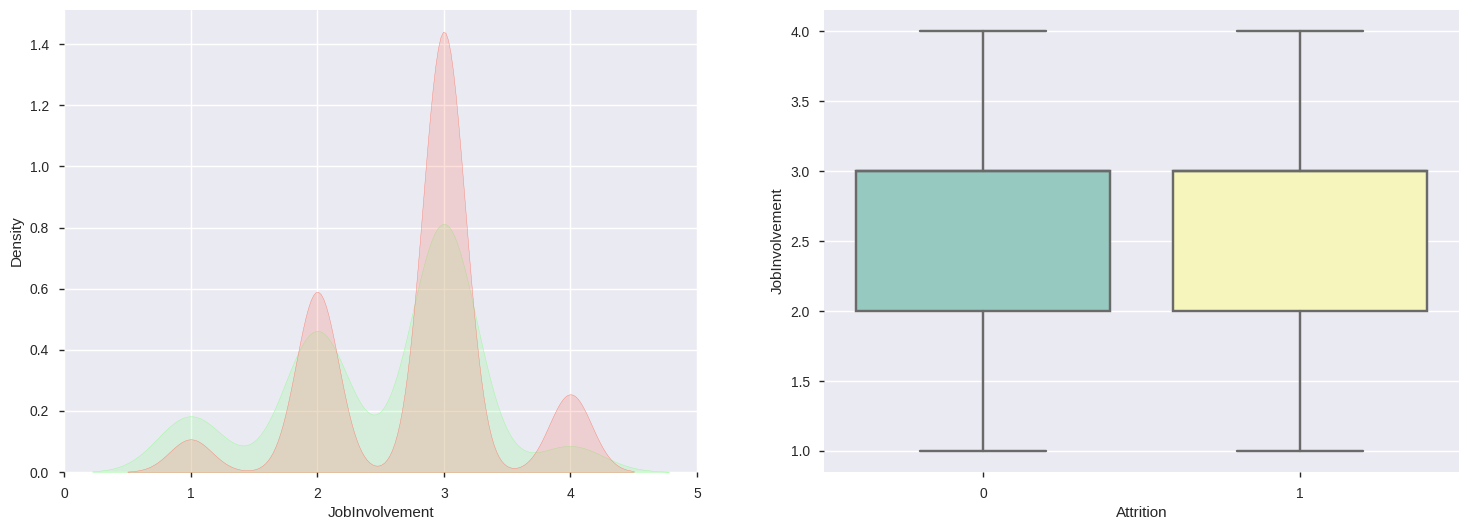

In [ ]:
numerical_column_viz("JobInvolvement")

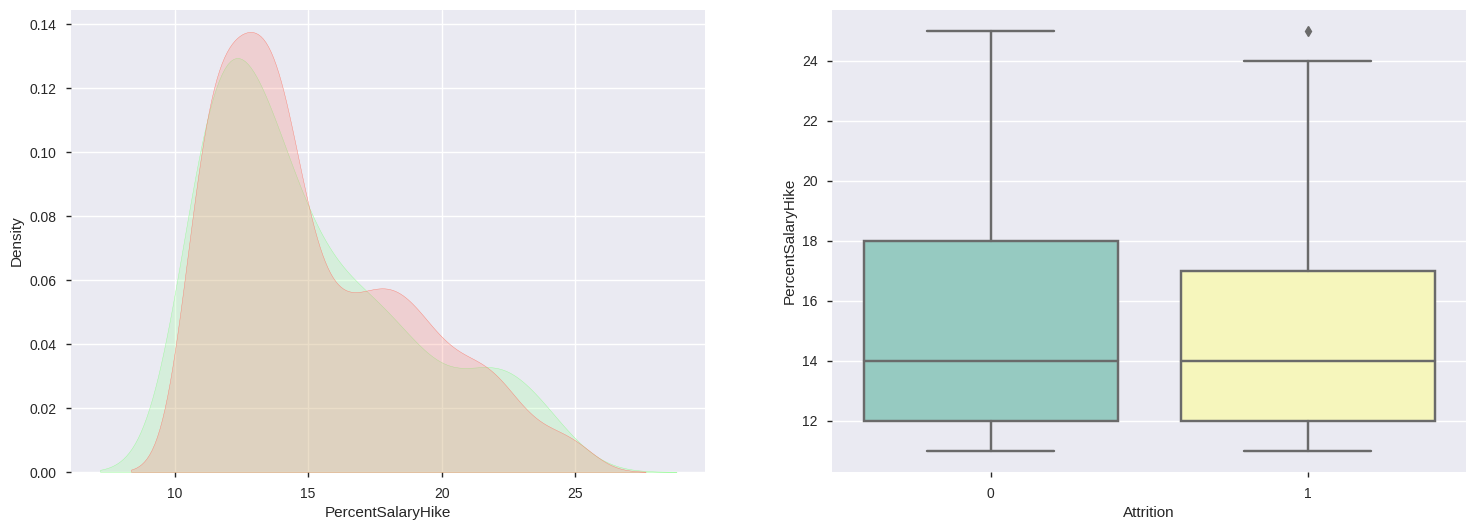

In [ ]:
numerical_column_viz("PercentSalaryHike")

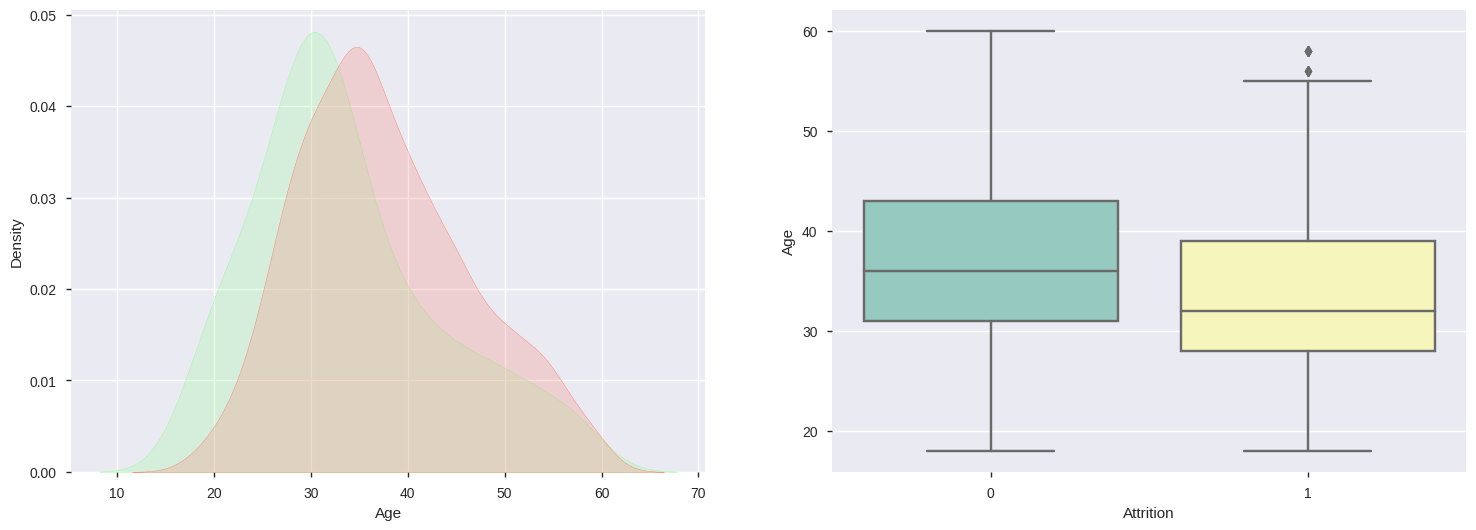

In [ ]:
numerical_column_viz("Age")

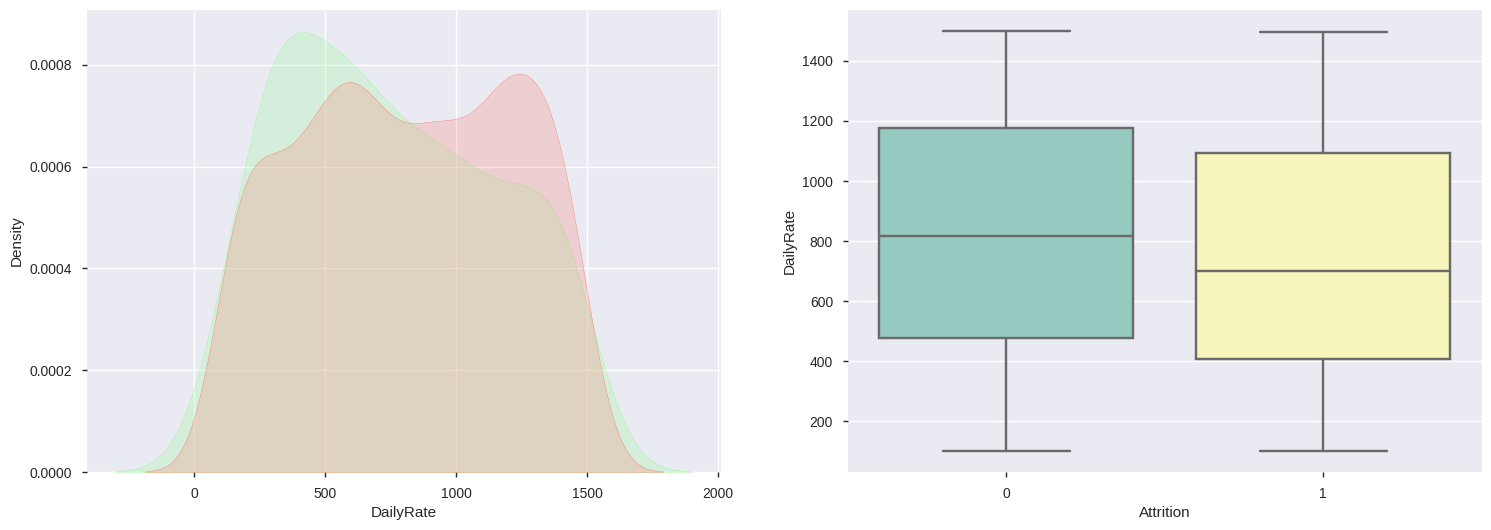

In [ ]:
numerical_column_viz("DailyRate")

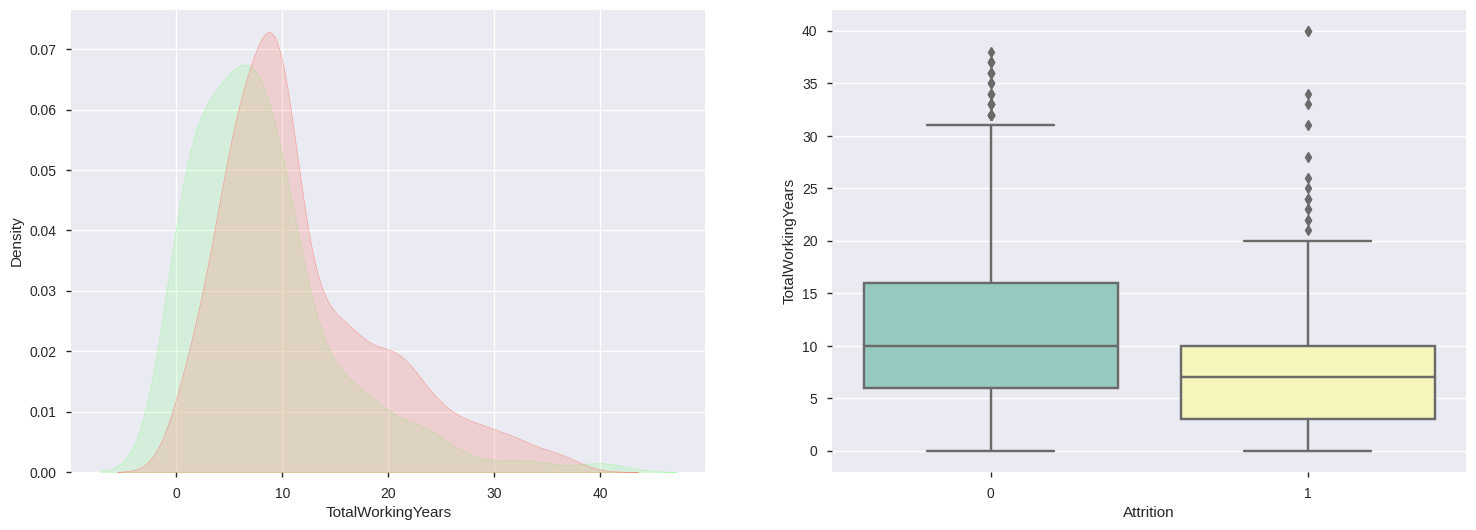

In [ ]:
numerical_column_viz("TotalWorkingYears")

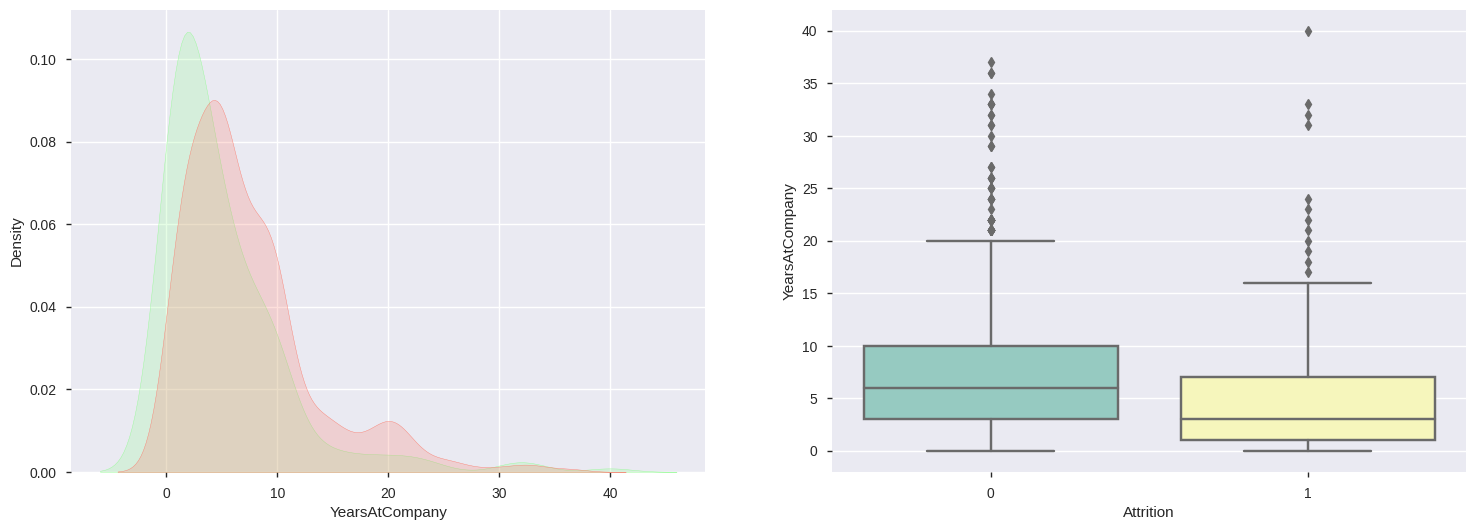

In [ ]:
numerical_column_viz("YearsAtCompany")

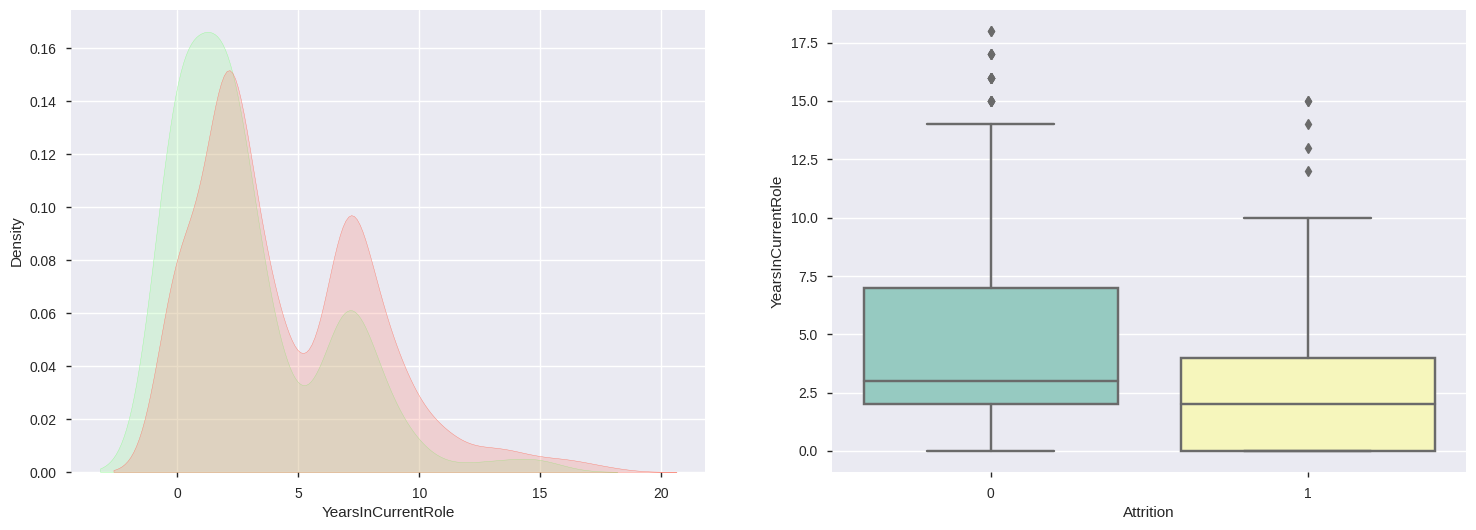

In [ ]:
numerical_column_viz("YearsInCurrentRole")

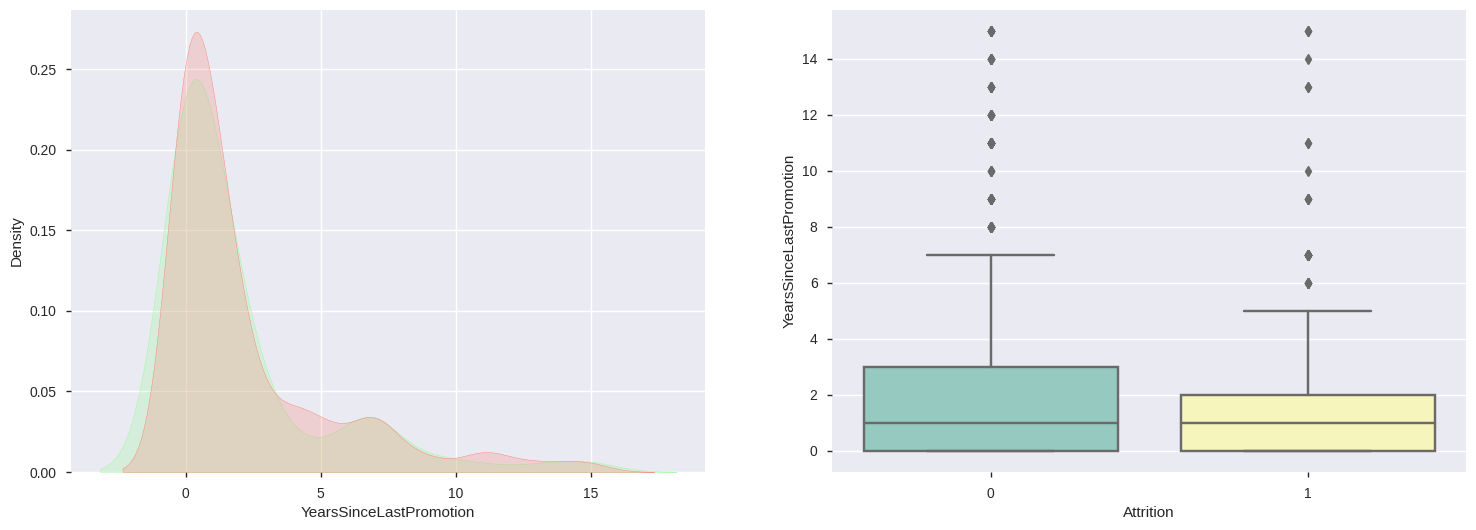

In [ ]:
numerical_column_viz("YearsSinceLastPromotion")

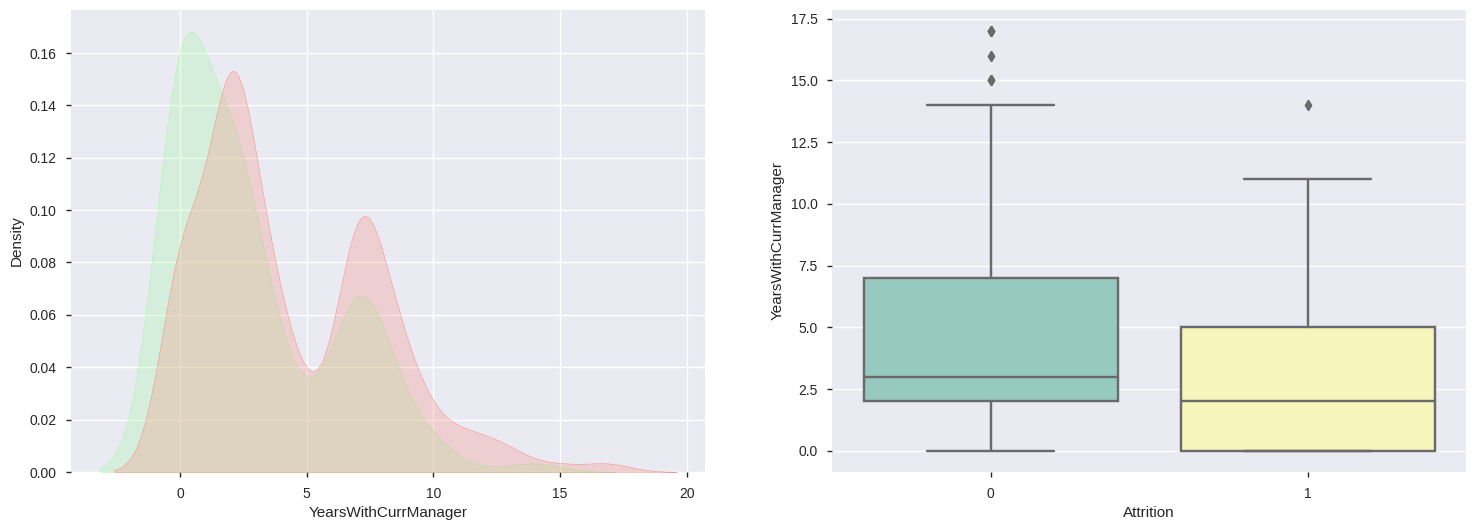

In [ ]:
numerical_column_viz("YearsWithCurrManager")

In [ ]:
def categorical_numerical(numerical_col, categorical_col1, categorical_col2):
    

    f,ax = plt.subplots(1,2, figsize=(20,8))
    
    g1= sns.swarmplot( categorical_col1, numerical_col,hue='Attrition', data=df, dodge=True, ax=ax[0], palette='Set2')
    ax[0].set_title(f'{numerical_col} vs {categorical_col1} separeted by Attrition')
    g1.set_xticklabels(g1.get_xticklabels(), rotation=90) 

    
    g2 = sns.swarmplot( categorical_col2, numerical_col,hue='Attrition', data=df, dodge=True, ax=ax[1], palette='Set2')
    ax[1].set_title(f'{numerical_col} vs {categorical_col1} separeted by Attrition')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=90) 

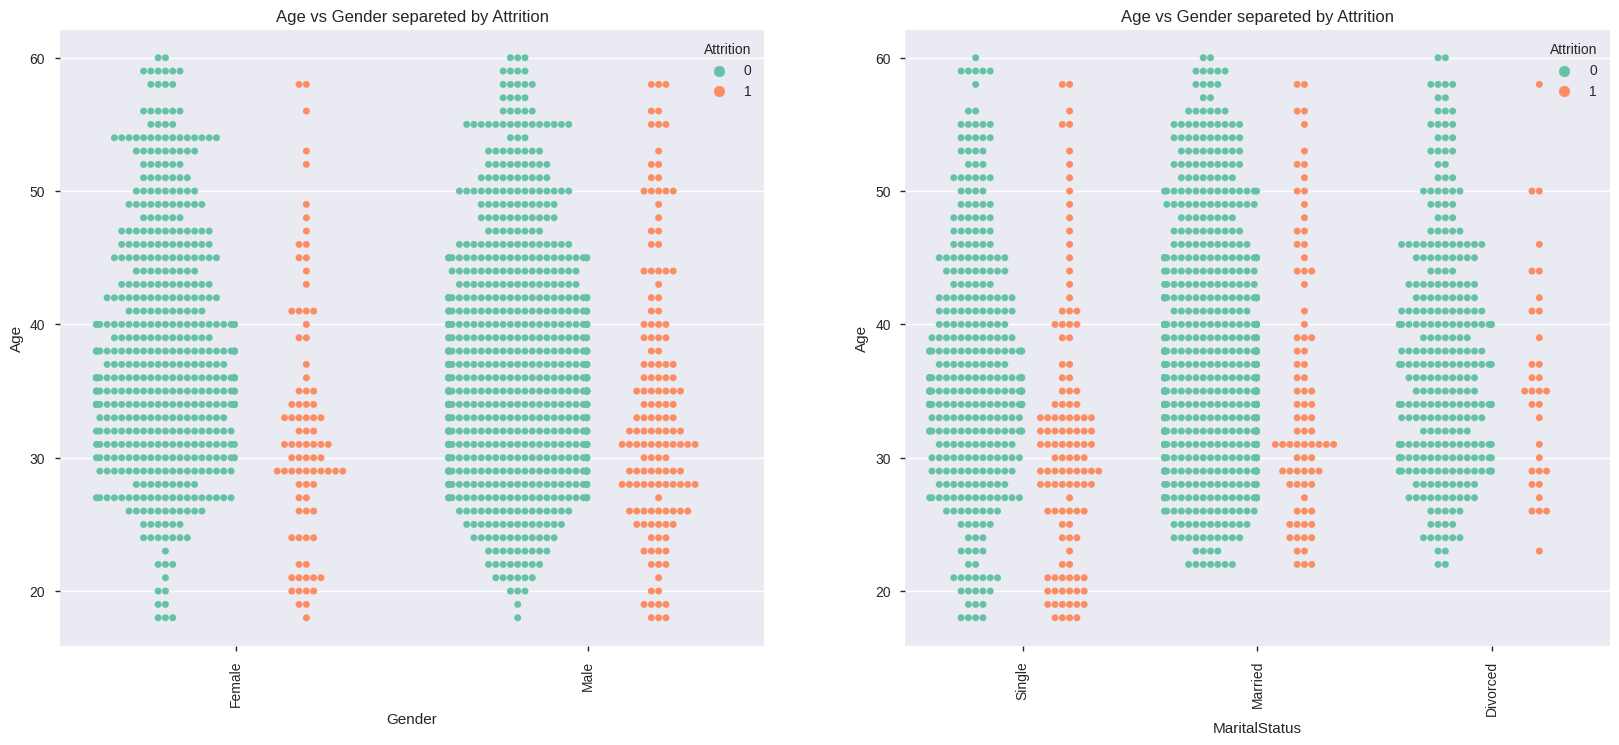

In [ ]:
categorical_numerical('Age','Gender','MaritalStatus')

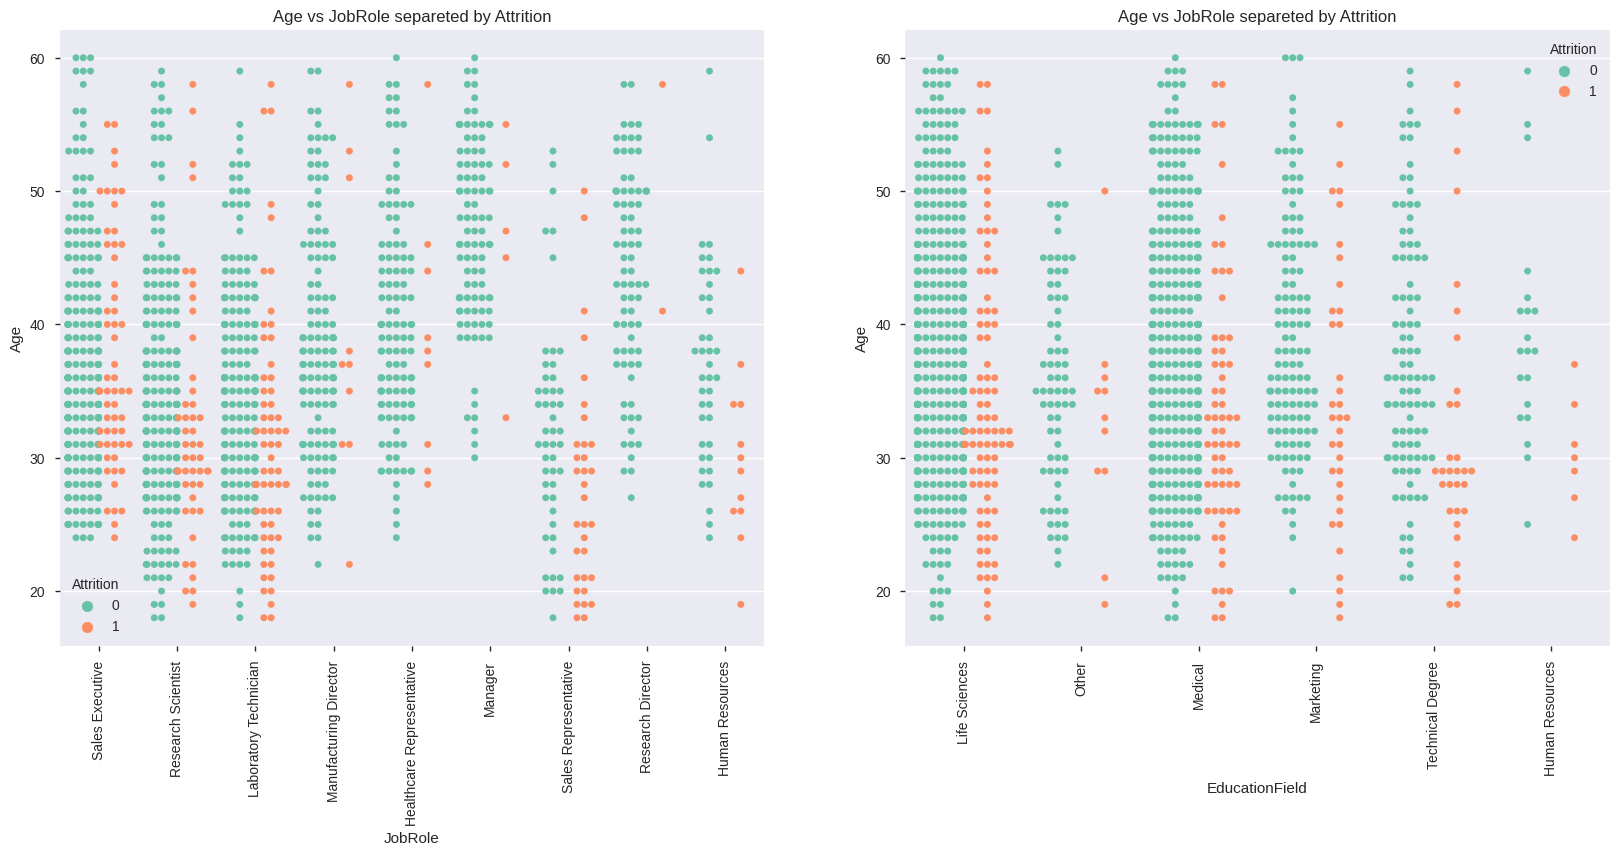

In [ ]:
categorical_numerical('Age','JobRole','EducationField')

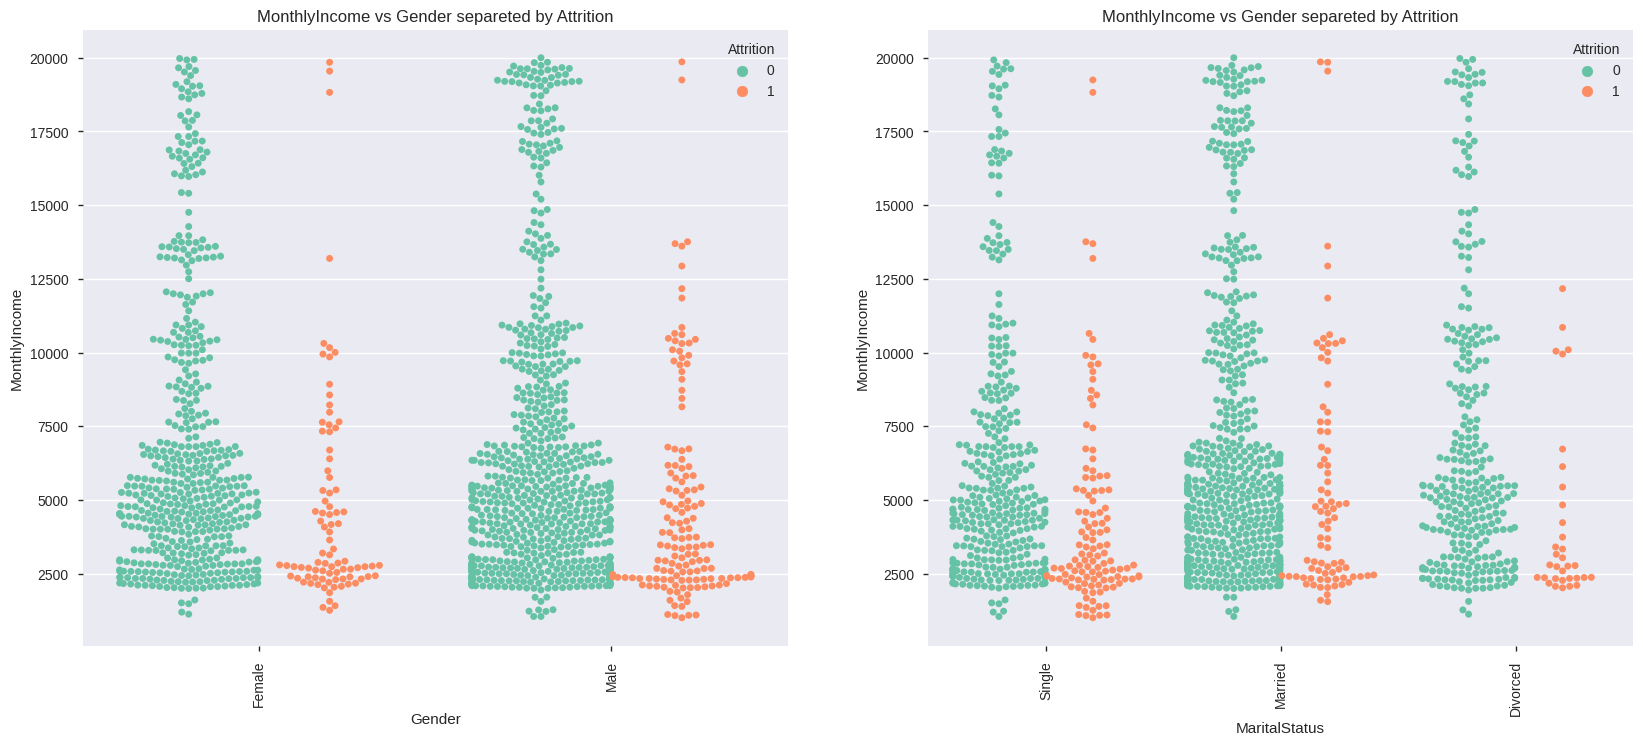

In [ ]:
categorical_numerical('MonthlyIncome','Gender','MaritalStatus')

In [ ]:
# 'EnviornmentSatisfaction', 'JobInvolvement', 'JobSatisfacction', 'RelationshipSatisfaction', 'WorklifeBalance' can be clubbed into a single feature 'TotalSatisfaction'

df['Total_Satisfaction'] = (df['EnvironmentSatisfaction'] + 
                            df['JobInvolvement'] + 
                            df['JobSatisfaction'] + 
                            df['RelationshipSatisfaction'] +
                            df['WorkLifeBalance']) /5 

# Drop Columns
df.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)

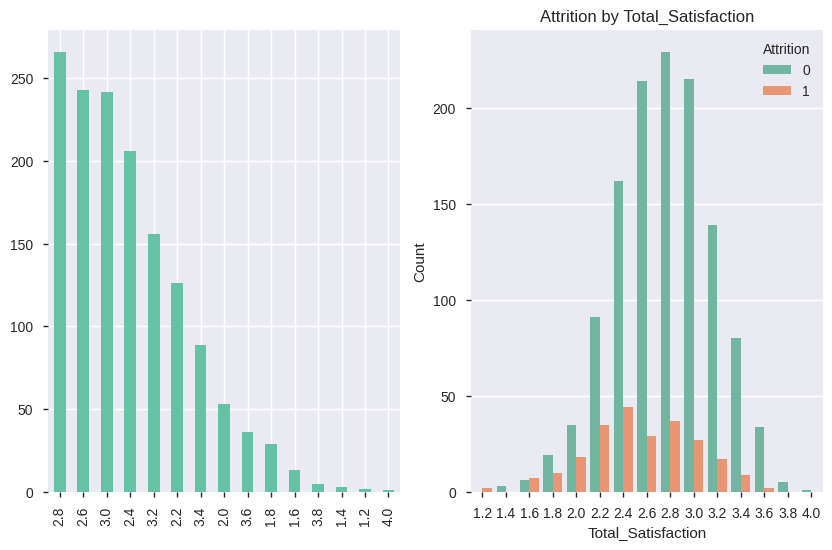

In [ ]:
categorical_column_viz('Total_Satisfaction')

In [ ]:
df.Total_Satisfaction.describe()

count    1470.000000
mean        2.730748
std         0.428551
min         1.200000
25%         2.400000
50%         2.800000
75%         3.000000
max         4.000000
Name: Total_Satisfaction, dtype: float64

In [ ]:
# Convert Total satisfaction into boolean
# median = 2.8
# x = 1 if x >= 2.8

df['Total_Satisfaction_bool'] = df['Total_Satisfaction'].apply(lambda x:1 if x>=2.8 else 0 ) 
df.drop('Total_Satisfaction', axis=1, inplace=True)

In [ ]:
# It can be observed that the rate of attrition of employees below age of 35 is high

df['Age_bool'] = df['Age'].apply(lambda x:1 if x<35 else 0)
df.drop('Age', axis=1, inplace=True)

In [ ]:
# It can be observed that the employees are more likey the drop the job if dailtRate less than 800

df['DailyRate_bool'] = df['DailyRate'].apply(lambda x:1 if x<800 else 0)
df.drop('DailyRate', axis=1, inplace=True)

In [ ]:
# Employees working at R&D Department have higher attrition rate

df['Department_bool'] = df['Department'].apply(lambda x:1 if x=='Research & Development' else 0)
df.drop('Department', axis=1, inplace=True)

In [ ]:
# Rate of attrition of employees is high if DistanceFromHome > 10

df['DistanceFromHome_bool'] = df['DistanceFromHome'].apply(lambda x:1 if x>10 else 0)
df.drop('DistanceFromHome', axis=1, inplace=True)

In [ ]:
# Employees are more likey to drop the job if the employee is working as Laboratory Technician

df['JobRole_bool'] = df['JobRole'].apply(lambda x:1 if x=='Laboratory Technician' else 0)
df.drop('JobRole', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's hourly rate < 65

df['HourlyRate_bool'] = df['HourlyRate'].apply(lambda x:1 if x<65 else 0)
df.drop('HourlyRate', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's MonthlyIncome < 4000

df['MonthlyIncome_bool'] = df['MonthlyIncome'].apply(lambda x:1 if x<4000 else 0)
df.drop('MonthlyIncome', axis=1, inplace=True)

In [ ]:
# Rate of attrition of employees is high if NumCompaniesWorked < 3

df['NumCompaniesWorked_bool'] = df['NumCompaniesWorked'].apply(lambda x:1 if x>3 else 0)
df.drop('NumCompaniesWorked', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's TotalWorkingYears < 8

df['TotalWorkingYears_bool'] = df['TotalWorkingYears'].apply(lambda x:1 if x<8 else 0)
df.drop('TotalWorkingYears', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's YearsAtCompany < 3

df['YearsAtCompany_bool'] = df['YearsAtCompany'].apply(lambda x:1 if x<3 else 0)
df.drop('YearsAtCompany', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's YearsInCurrentRole < 3

df['YearsInCurrentRole_bool'] = df['YearsInCurrentRole'].apply(lambda x:1 if x<3 else 0)
df.drop('YearsInCurrentRole', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's YearsSinceLastPromotion < 1

df['YearsSinceLastPromotion_bool'] = df['YearsSinceLastPromotion'].apply(lambda x:1 if x<1 else 0)
df.drop('YearsSinceLastPromotion', axis=1, inplace=True)

In [ ]:
# Employees are more likey to the drop the job if the employee's YearsWithCurrManager < 1

df['YearsWithCurrManager_bool'] = df['YearsWithCurrManager'].apply(lambda x:1 if x<1 else 0)
df.drop('YearsWithCurrManager', axis=1, inplace=True)

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x=='Female' else 0)

In [ ]:
df.drop('MonthlyRate', axis=1, inplace=True)
df.drop('PercentSalaryHike', axis=1, inplace=True)

In [ ]:
convert_category = ['BusinessTravel','Education','EducationField','MaritalStatus','StockOptionLevel','OverTime','Gender','TrainingTimesLastYear']
for col in convert_category:
        df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Attrition                     1470 non-null   int64   
 1   BusinessTravel                1470 non-null   category
 2   Education                     1470 non-null   category
 3   EducationField                1470 non-null   category
 4   Gender                        1470 non-null   category
 5   JobLevel                      1470 non-null   int64   
 6   MaritalStatus                 1470 non-null   category
 7   OverTime                      1470 non-null   category
 8   PerformanceRating             1470 non-null   int64   
 9   StockOptionLevel              1470 non-null   category
 10  TrainingTimesLastYear         1470 non-null   category
 11  Total_Satisfaction_bool       1470 non-null   int64   
 12  Age_bool                      1470 non-null   in

In [ ]:
#separate the categorical and numerical data
X_categorical = df.select_dtypes(include=['category'])
X_numerical = df.select_dtypes(include=['int64'])
X_numerical.drop('Attrition', axis=1, inplace=True)

In [ ]:
y = df['Attrition']

In [ ]:
# One HOt Encoding Categorical Features

onehotencoder = OneHotEncoder()

X_categorical = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical = pd.DataFrame(X_categorical)
X_categorical

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1466,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1467,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1468,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
#concat the categorical and numerical values

X_all = pd.concat([X_categorical, X_numerical], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,DistanceFromHome_bool,JobRole_bool,HourlyRate_bool,MonthlyIncome_bool,NumCompaniesWorked_bool,TotalWorkingYears_bool,YearsAtCompany_bool,YearsInCurrentRole_bool,YearsSinceLastPromotion_bool,YearsWithCurrManager_bool
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,1,1,1,1,1,1,1
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,1,1,0,0,0,0,0,1
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,1,1,1,1,1,1,0,0


In [ ]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 144 entries, 0 to YearsWithCurrManager_bool
dtypes: float64(128), int64(16)
memory usage: 1.6 MB


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X_all,y, test_size=0.30)

In [ ]:
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (1029, 144), Test Data Shape (441, 144)


In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,DistanceFromHome_bool,JobRole_bool,HourlyRate_bool,MonthlyIncome_bool,NumCompaniesWorked_bool,TotalWorkingYears_bool,YearsAtCompany_bool,YearsInCurrentRole_bool,YearsSinceLastPromotion_bool,YearsWithCurrManager_bool
1388,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1,0,1,0,1,0,0,1,0,0
1207,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,1,1,0,0,1,0,0
1253,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,0
762,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,1,1,1,1,0,1,0,0
1161,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train,y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs = -1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [ ]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train,y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 89.8
Accuracy CV 10-Fold: 88.63
Running Time: 0:00:01.753627


In [ ]:
# SVC
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(SVC(),X_train,y_train,10)
svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

Accuracy: 88.53
Accuracy CV 10-Fold: 85.91
Running Time: 0:00:00.497278


In [ ]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),X_train, y_train,10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 89.89
Accuracy CV 10-Fold: 88.73
Running Time: 0:00:01.055932


In [ ]:
# K Nearest Neighbour
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3),X_train,y_train,10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 88.82
Accuracy CV 10-Fold: 83.58
Running Time: 0:00:00.317981


In [ ]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),X_train,y_train,10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 68.9
Accuracy CV 10-Fold: 66.28
Running Time: 0:00:00.198038


In [ ]:
# Perceptron
start_time = time.time()
train_pred_gaussian, acc_perceptron, acc_cv_perceptron = fit_ml_algo(Perceptron(),X_train,y_train,10)
perceptron_time = (time.time() - start_time)
print("Accuracy: %s" % acc_perceptron)
print("Accuracy CV 10-Fold: %s" % acc_cv_perceptron)
print("Running Time: %s" % datetime.timedelta(seconds=perceptron_time))

Accuracy: 81.24
Accuracy CV 10-Fold: 83.58
Running Time: 0:00:00.310640


In [ ]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),X_train, y_train,10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 86.59
Accuracy CV 10-Fold: 84.74
Running Time: 0:00:00.333166


In [ ]:
# Decision Tree
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),X_train, y_train,10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 79.59
Running Time: 0:00:00.257872


In [ ]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),X_train, y_train,10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 93.2
Accuracy CV 10-Fold: 87.17
Running Time: 0:00:02.839144


In [ ]:
# Random Forest
start_time = time.time()
train_pred_dt, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(n_estimators=100),X_train, y_train,10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 85.81
Running Time: 0:00:01.668533


In [ ]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143])

In [ ]:
# pool training data and categorical feature labels together
train_pool = Pool(X_train, y_train,cat_features)  

NameError: ignored

In [ ]:
# CatBoost
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.010429
0:	learn: 0.6852883	total: 71.9ms	remaining: 1m 11s
1:	learn: 0.6773586	total: 99.1ms	remaining: 49.5s
2:	learn: 0.6686398	total: 121ms	remaining: 40.1s
3:	learn: 0.6614040	total: 127ms	remaining: 31.7s
4:	learn: 0.6533311	total: 136ms	remaining: 27s
5:	learn: 0.6465505	total: 144ms	remaining: 23.8s
6:	learn: 0.6393723	total: 151ms	remaining: 21.4s
7:	learn: 0.6332867	total: 159ms	remaining: 19.7s
8:	learn: 0.6275525	total: 166ms	remaining: 18.3s
9:	learn: 0.6201179	total: 174ms	remaining: 17.3s
10:	learn: 0.6133255	total: 179ms	remaining: 16.1s
11:	learn: 0.6071338	total: 187ms	remaining: 15.4s
12:	learn: 0.6006636	total: 198ms	remaining: 15.1s
13:	learn: 0.5938675	total: 206ms	remaining: 14.5s
14:	learn: 0.5882636	total: 214ms	remaining: 14s
15:	learn: 0.5836373	total: 225ms	remaining: 13.8s
16:	learn: 0.5793337	total: 239ms	remaining: 13.8s
17:	learn: 0.5734673	total: 260ms	remaining: 14.2s
18:	learn: 0.5683876	total: 271ms	remaining: 14s
19:	learn: 0.5

In [ ]:
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# cross-validation
cv_data = cv(train_pool,cv_params,fold_count=10,plot=True)
catboost_time = (time.time() - start_time)

# Cross-validation accuracy metric
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_log,
        acc_svc,
        acc_linear_svc,
        acc_knn,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,  
        acc_dt,
        acc_gbt,
        acc_rf,
        acc_catboost
    ]})
models.sort_values(by='Score', ascending=False)

In [ ]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_cv_log,
        acc_cv_svc,
        acc_cv_linear_svc,
        acc_cv_knn,
        acc_cv_gaussian,
        acc_cv_perceptron,
        acc_cv_sgd,  
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_rf,
        acc_cv_catboost
    ]})
cv_models.sort_values(by='Score', ascending=False)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
pred_df = pd.DataFrame(index=X_test.index)

In [ ]:
pred_df['Attrition'] = predictions
pred_df.head()

In [ ]:
# Cross-validation accuracy metric
score = round(metrics.accuracy_score(y_test, predictions) * 100, 2)

In [ ]:
print("Accuracy: %s" % score)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()